Şıhmehmet Yıldız

$511212133$

yildizsih@itu.edu.tr

MAT555E - Homework 1

# Question 1

Write a python function that takes 4 arguments `a`, `b`, `N` and `fn` where 

* `a` and `b` determine an interval in $\mathbb{R}$ 
* `N` is a positive integer and 
* `fn` is a real valued function

The function you write should calculate the Riemann sum of the function `fn` over the interval [`a`,`b`] with `N` equal subintervals.

# Answer 1

A Riemann sum is an approximation of the area under a curve by dividing it into multiple rectangle shapes. The code is written for the rectangular and trapezoidal discritization method. 

The reference value for the defined rectangles can be the left, right and middle of the rectangle. Therefore, the position to be referenced to the code is defined as an optional input parameter.

In [28]:
# İmprt the base python package
import numpy as np

In [29]:
#function for Riemann sum with rectangular discritization
def RiemannSum(a,b,N,fn,refPoint='midpoint'):
    # Inputs =============================================
    # a (int) : lower interval limit
    # b (int) : upper interval limit
    # N (int) : number of subintervals
    # fn (function) : function
    # Outputs ============================================
    # AppArea (int) : Area of function over the interval [a,b]
    # ====================================================
    dx = (b-a)/N # Calculate the widths od rectangular
    
    if refPoint == 'midpoint': # use the value of the midpoint of the rectangle
        x = np.linspace(a+dx/2, b-dx/2, N) #x coordinates
    elif refPoint == 'left': # use the value of the left corner of the rectangle
        x = np.linspace(a, b-dx, N)
    elif refPoint == 'right': # use the value of the right corner of the rectangle
        x = np.linspace(a+dx, b, N)
    else:
        raise ValueError("Reference point options are 'left', 'midpoint' and 'right' " )
    
    appArea = np.sum(fn(x)*dx) # fn(x) is value of function at x point
    return appArea
    

In [30]:
def fn1(x): return (x**2) # Exact Value is 0.333333 for x**2 

In [31]:
RiemannSum(0,1,1000,fn1,refPoint='midpoint') 

0.33333325

In [32]:
def fn2(x): return (x**3) # Exact Value is 0.25 for x**3

In [33]:
RiemannSum(0,1,1000,fn2,refPoint='left') 

0.24950025000000006

In [34]:
#function for trapezoidal summation 
def TrapezodialSum(a,b,N,fn):
    # Inputs =============================================
    # a (int) : lower interval limit
    # b (int) : upper interval limit
    # N (int) : number of subintervals
    # fn (function) : function
    # Outputs ============================================
    # AppArea (int) : Area of function over the interval [a,b]
    # ====================================================
    dx = (b-a)/N # Calculate the widths od rectangular
    
    x = np.linspace(a, b, N+1) #x coordinates
    appArea = 0
    for i in range(N):
        appArea = appArea + (fn(x[i])+fn(x[i+1]))/2*dx 

    return appArea

In [35]:
TrapezodialSum(0,1,1000,fn1) 

0.33333349999999984

In [36]:
TrapezodialSum(0,1,1000,fn2) 

0.25000024999999987

# Question 2

We want to sample random samples from the unit circle $x^2+y^2=1$. Write a python function which takes one parameter $N$ the number of sample points and returns a sample $N$ points on the unit circle as a $N\times 2$ numpy matrix. Calculate some examples, and visualize them.

# Answer 2
The x and y coordinates of a circle can be represented by radius ($r$) and angle ($\theta$).

$x = r * cos(\theta)$ 

$y = r * sin(\theta)$

Since random sampling is desired on unit circle, $r = 1$. Therefore, random sampling can be made on the circle by generating the theta parameter randomly.


In [37]:
# import the base python packages
import numpy as np
import matplotlib.pyplot as plt

In [38]:
def PointOnUnitCircle(N):
    # Inputs =============================================
    # N (int) : the number of sampling points
    # Outputs ============================================
    # coor (ndarray(N*2)) : N points on the unit circle
    # ====================================================
    theta = 2*np.pi * np.random.rand(N,1) #create random theta angle
    x,y = np.cos(theta), np.sin(theta) #Calculate x and y coordinate
    coor = np.hstack((x,y)) # combine the x and y coordinate values
    return coor

In [39]:
Coor = PointOnUnitCircle(50) #Calculate 50 random sampling on unit circle

(-1.1, 1.1)

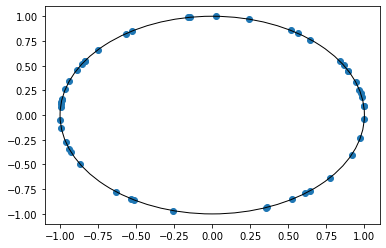

In [40]:
fig, ax = plt.subplots() 
ax.scatter(Coor[:,0], Coor[:,1]) # scatter plot for random sampling

draw_circle = plt.Circle((0, 0), 1,fill=False) # plot circle to see location of random sampling
ax.add_artist(draw_circle)

plt.xlim([-1.1, 1.1]) # x axis limits of figure
plt.ylim([-1.1, 1.1]) # y axis limits of figure

# Question 3

Generalize the function above to sampling over the unit sphere $x^2+y^2+z^2=1$. The function should return a $N\times 3$ numpy array.  Calculate some examples, and visualize them. [Hint: Use spherical coordinates.]

# Answer 3

The spherical coordinate is used in this question. The x, y, z coordinates of a point on a sphere can be expressed as a radius value (r) and two angle values ($\theta, \varphi$).

$x=r cos(\varphi) sin(\theta)$

$y=r sin(\varphi) sin(\theta)$

$z = r cos(\theta)$

where $r>0$,  $0<\theta<\pi$ rad, $0 < \varphi < 2\pi$ rad

In [41]:
# import the base python packages
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# function for random sampling over the unit sphere
def PointOnUnitSphere(N):
    # Inputs =============================================
    # N (int) : the number of sampling points
    # Outputs ============================================
    # coor (ndarray(N*2)) : N points on the unit sphere
    # ====================================================
    randomP = np.random.rand(N,2)
    theta = (np.pi * randomP[:,0]).reshape(N,1)
    phi = (2 * np.pi * randomP[:,1] - np.pi).reshape(N,1)
    
    x = np.sin(theta) * np.cos(phi) # calculate x coordinate
    y = np.sin(theta) * np.sin(phi) # calculate y coordinate
    z = np.cos(theta) # calculate z coordinate

    coor = np.hstack((x,y,z)) #combine the x,y,z coordinates
    return coor

def SphereCoor():
    # draw sphere
    u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)
    return x,y,z

In [43]:
Coor = PointOnUnitSphere(200) #Calculate 100 random sampling on unit sphere

Text(0.5, 0, 'Z-axis')

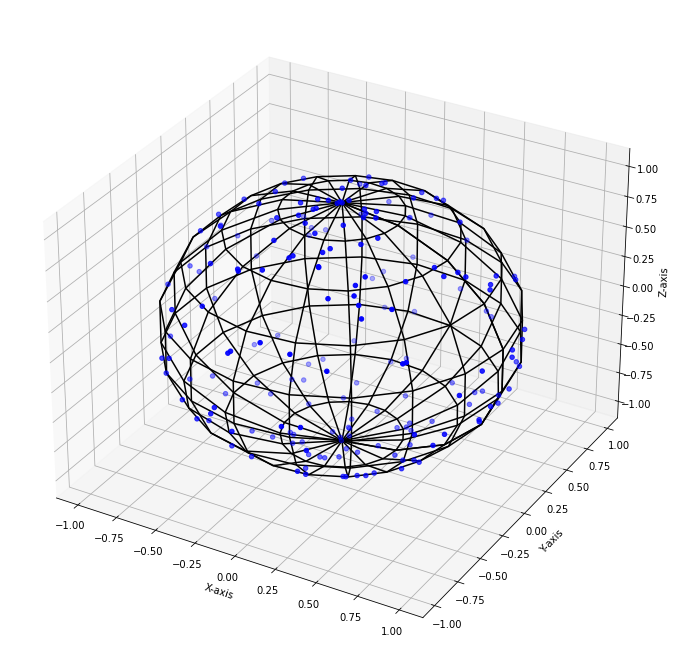

In [44]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(Coor[:,0],Coor[:,1],Coor[:,2], color='b') # scatter plot for random sampling

x,y,z = SphereCoor()
ax.plot_wireframe(x,y,z, color='k') # plot unit sphere to see location of random sampling

ax.set_xlabel('X-axis') # x axis limits of figure
ax.set_ylabel('Y-axis') # y axis limits of figure
ax.set_zlabel('Z-axis') # z axis limits of figure

# Question 4

How can we generalize this to sampling over an $n$-dimensional sphere $x_1^2+\cdots+x_n^2=1$? Write a python function and explain your code.

# Answer 4



In [45]:
import numpy as np

In [46]:
# Function for sampling on an n-dimensional sphere
def PointOnNdimSphere(Dimension):
    # Inputs =============================================
    # Dimension (int) : dimension of sphere
    # Outputs ============================================
    # Coor (ndarray(1*Dimension)) : coordinate of point of n-dimensional sphere
    # ====================================================
    randomP = np.random.uniform(-1,1,size=(1,Dimension)) # Generate random point
    norm = np.sqrt(np.sum(randomP**2)) # calculate the norm of point
    Coor = randomP / norm #normalize the point
    return Coor

In [47]:
PointOnNdimSphere(4)

array([[-0.73570721,  0.55304224,  0.38730171,  0.0536337 ]])

In [48]:
# Function for sampling on an n-dimensional sphere
def PointOnNdimSphere(N, Dimension):
    # Inputs =============================================
    # N (int) : Number of sampling
    # Dimension (int) : dimension of sphere
    # Outputs ============================================
    # Coor (ndarray(N*Dimension)) : coordinates of point of n-dimensional sphere
    # ====================================================
    randomP = np.random.uniform(-1,1,size=(N,Dimension)) #generate random N point
    norm = [np.sqrt(np.sum(x**2)) for x in randomP] # calculate the distance of the points from the center (0,...,0)
    Coor = [randomP[i,:] / norm[i] for i in range(N)] # normalize the coordinates of random points with their distance from the center
    Coor = np.array(Coor) # convert the type of variable from list to numpy array
    return Coor

In [49]:
PointOnNdimSphere(10, 5) 

array([[-0.17266987, -0.67342043,  0.27063087,  0.12359652, -0.65434919],
       [ 0.59731863, -0.07108036,  0.5630592 , -0.54070416, -0.16959184],
       [-0.48479165,  0.29825706, -0.34882023, -0.42645935, -0.61030866],
       [-0.46673142,  0.4922225 ,  0.18625019,  0.48413881,  0.52038377],
       [ 0.6078317 ,  0.50442506, -0.60706455,  0.0726227 , -0.04790156],
       [ 0.39155621, -0.49257613, -0.22562329, -0.71943971, -0.18855537],
       [ 0.25871452, -0.58348061, -0.26270767,  0.68127148,  0.24386685],
       [-0.33432799, -0.52395381,  0.4520562 , -0.17191853,  0.61626813],
       [ 0.03743511, -0.32229899,  0.59058764, -0.57139239, -0.46844311],
       [ 0.54631995, -0.60270898, -0.28083704, -0.47920246,  0.17254553]])

# Question 5

Istanbul Municipality has a [data service](https://data.ibb.gov.tr/) that is accessible via an API. Your task is to visualize the stops. Use the [Basemap](https://matplotlib.org/basemap/) library to draw the map.  Their locations (longitudes and latitudes) are given at this [link](https://data.ibb.gov.tr/dataset/public-transport-gtfs-data/resource/d1f7c258-bbc1-406f-9ab2-7a7c1797c673). Here is a list of things I'd like:

1. You should pull the data via the API. I don't want to see the file locally.
2. In the visualization, the size of the dot representing each stop should depend on the number of people using it.

For the second part, browse through the data server and find the relevant data source.

In [2]:
#import python packages
import pandas as pd
import requests
import json
from mpl_toolkits.basemap import Basemap

ImportError: cannot import name 'dedent'

In [3]:
response_API = requests.get('https://data.ibb.gov.tr/datastore/odata3.0/d1f7c258-bbc1-406f-9ab2-7a7c1797c673?$top=6440&$format=json')
text = response_API.text
veri = json.loads(text)
data = veri.get('value')
stop_info = pd.DataFrame(data)

In [25]:
stop_info

,_id,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,wheelchair_boarding
0,1,92991,İ1458D,AVC.METROBÜS142-145A,None,40.983912013953,28.725898772944,None,None,0,None,None,0
1,2,90141,Ş0236A,ÖĞRETMENLER SİTESİ,None,41.0801661747024,28.9252630448377,None,None,0,None,None,0
2,3,90079,İ0546A,ESENYURT,None,41.0324982916645,28.6811544588785,None,None,0,None,None,0
3,4,92593,8645,Giyimkent Cad.,None,41.0723713307728,28.868563774419,None,None,0,None,None,0
4,5,91280,İ0902B,FATİH SOKAK,None,40.9808765862329,28.723141435618,None,None,0,None,None,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6435,6436,40087,64,Emniyet Mahallesi,Emniyet Mahallesi,41.0286362637842,29.0580706170207,None,None,0,None,None,0
6436,6437,94840,4161,Taksim,Taksim,41.0365534366685,28.9812973192194,None,None,0,None,None,0
6437,6438,94843,4162,Taksim,Taksim,41.0365194624381,28.9810794773464,None,None,0,None,None,0
6438,6439,87211,2882,Uzunçayır,None,40.998337448258,29.0569143353948,None,None,0,None,None,0


In [26]:
stop_info['stop_lat'] = pd.to_numeric(stop_info['stop_lat'])
stop_info['stop_lon'] = pd.to_numeric(stop_info['stop_lon'])

In [27]:
min_StopLat = np.min(stop_info['stop_lat'])
max_StopLat = np.max(stop_info['stop_lat'])
min_StopLon = np.min(stop_info['stop_lon'])
max_StopLon = np.max(stop_info['stop_lon'])

In [28]:
fig = plt.figure(figsize=(20,12))

m = Basemap(projection='merc',
           llcrnrlat=min_StopLat,
           urcrnrlat=max_StopLat,
           llcrnrlon=min_StopLon,
           urcrnrlon=max_StopLon,
           resolution='i')

m.drawcoastlines()
m.drawcountries(color='gray')
#m.drawlsmask(land_color='wheat', ocean_color='lightblue')
plt.show()

NameError: name 'Basemap' is not defined

<Figure size 1440x864 with 0 Axes>

In [29]:
xs,ys = m(stop_info['stop_lon'],stop_info["stop_lat"])
sizes = np.exp(stop_info['stop_id'])


fig = plt.figure(figsize=(20,12))
m.scatter(xs, ys, s=sizes, c='red', alpha=0.2)
m.drawcoastlines()
m.drawcountries(color='gray')
m.drawrivers()
plt.show()

NameError: name 'm' is not defined

# REFERENCE
1. [Mathematical Python, Riemann Sums!](https://personal.math.ubc.ca/~pwalls/math-python/integration/riemann-sums/)
2. [Extereme Learning](http://extremelearning.com.au/how-to-generate-uniformly-random-points-on-n-spheres-and-n-balls/)
3. [AskPython](https://www.askpython.com/python/examples/pull-data-from-an-api)
4. [Voelker, A.R. and et all. (2017). Efficiently sampling vectors and coordinates from the n-sphere and n-ball](http://compneuro.uwaterloo.ca/files/publications/voelker.2017.pdf)